In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import csv

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housingprice/data.csv


In [2]:
class GradientDescent:
    def __init__(self, dimension, data_feat, data_exp, alpha, threshold):
        self.dimension = dimension
        self.data_feat = data_feat
        self.data_exp = data_exp
        self.data_feat = data_feat
        self.data_exp = data_exp
        self.features = [1 for i in range(dimension)]
        self.alpha = alpha
        self.threshold = threshold

    ## This cost method needs to be overridden in subclass of GradientDescent.
    def cost(self,feature):
        return 0


    def derivative_partial(self, independent):
        step = list(self.features)
        #print("Step: {}, Featue: {}".format(step, self.features))
        step[independent] = step[independent] + self.threshold
        #print("step :{}, Features:{} , Cost step :{}, Cost Feature: {} ".format(step,self.features, self.cost(step),self.cost(self.features)))
        derivative = (self.cost(step) - self.cost(self.features))/self.threshold
        #print("Derivative : ", derivative)
        return derivative

    def descent(self, iteration):
        for i in range(iteration):
            newset = []
            for j in range(self.dimension):
                new = self.features[j] - self.alpha * self.derivative_partial(j)
                newset.append(new)
            #print("****************************************************")
            self.features = newset

        return self.features

Enter number of Iterations (For fast results enter 100) :  100


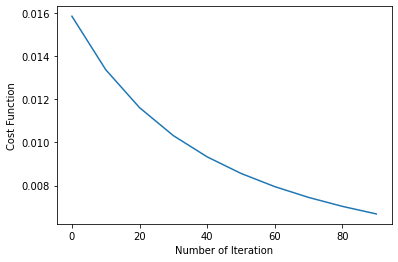

Predicted value for featureset [1, 23, 1106, 252, 790, 230, 1.8523] is : 685815644.5952654


In [22]:
class LinearRegressionI(GradientDescent):

    def __init__(self, dimension, data_feat, data_exp, alpha, threshold):
        super().__init__(dimension, data_feat, data_exp, alpha, threshold)
        if self.dimension != len(data_feat[0]):
            raise Exception("Invalid data set.")

    ## Overridden cost function from superclass.
    def cost(self,feature):
        cos = 0

        for i in range(len(self.data_feat)):
            s = 0
            for j in range(len(self.data_feat[i])):
                s += feature[j]*self.data_feat[i][j]
            diff = abs(s - self.data_exp[i])
            diff = diff**3 ##Cost function is cube of absolute value of difference
            cos += diff

        cos = cos/(2*len(self.data_feat))
        return cos



    def predict(self,feature):
        if len(feature) != len(self.features):
            raise Exception("Unappropriate data.")

        s = 0
        for i in range(len(feature)):
            s+= self.features[i]*feature[i]

        return s


## __Main__

data_feat = []      #Training data set
data_exp = []       #Training expected values

test_feat = []      #Testing dataset
test_exp = []       #Testing Expected values



with open('../input/housingprice/data.csv') as data:
    csv_reader = csv.reader(data, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            pass
            line_count += 1
        else:
            if line_count < 8000:
                data_feat.append([1, int(row[0])/52, int(row[1])/37937, int(row[2])/5471, int(row[3])/35682, int(row[4])/5189, float(row[5])/15.0001])
                data_exp.append(float(row[6])/500001)
                line_count+=1
            else:
                test_feat.append([1, int(row[0])/52, int(row[1])/37937, int(row[2])/5471, int(row[3])/35682, int(row[4])/5189, float(row[5])/15.0001])
                test_exp.append(float(row[6])/500001)
                line_count+=1



demo = LinearRegressionI(7,data_feat,data_exp,0.5,0.01)
n = int(input("Enter number of Iterations (For fast results enter 100) : "))
x = np.arange(0,n,10)
y = []
for i in range(len(x)):
    demo.descent(10)
    y.append(demo.cost(demo.features))

plt.plot(x,y)
plt.ylabel("Cost Function")
plt.xlabel("Number of Iteration")
plt.show()          #To display Variation of Cost function with number of iterations

predicted = demo.predict([1,23,1106,252,790,230,1.8523])*500001

print("Predicted value for featureset {} is : {}".format([1,23,1106,252,790,230,1.8523],predicted))

Enter number of Iterations (For fast results enter 100) :  100


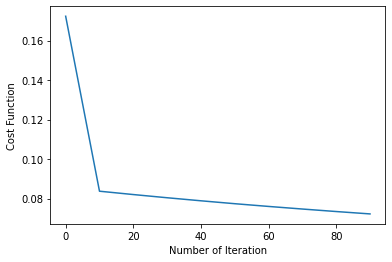

Predicted value for featureset [1, 23, 1106, 252, 790, 230, 1.8523] is : 906257526.156974


In [24]:
class LinearRegressionII(GradientDescent):

    def __init__(self, dimension, data_feat, data_exp, alpha, threshold):
        super().__init__(dimension, data_feat, data_exp, alpha, threshold)
        if self.dimension != len(data_feat[0]):
            raise Exception("Invalid data set.")

    ## Overridden cost function from superclass.
    def cost(self,feature):
        cos = 0

        for i in range(len(self.data_feat)):
            s = 0
            for j in range(len(self.data_feat[i])):
                s += feature[j]*self.data_feat[i][j]
            diff = abs(s - self.data_exp[i])
            cos += diff     ## Cost function is absolute value of difference

        cos = cos/(2*len(self.data_feat))
        return cos



    def predict(self,feature):
        if len(feature) != len(self.features):
            raise Exception("Unappropriate data.")

        s = 0
        for i in range(len(feature)):
            s+= self.features[i]*feature[i]

        return s


## __Main__

data_feat = []      #Training data set
data_exp = []       #Training expected values

test_feat = []      #Testing dataset
test_exp = []       #Testing Expected values



with open('../input/housingprice/data.csv') as data:
    csv_reader = csv.reader(data, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            pass
            line_count += 1
        else:
            if line_count < 8000:
                data_feat.append([1, int(row[0])/52, int(row[1])/37937, int(row[2])/5471, int(row[3])/35682, int(row[4])/5189, float(row[5])/15.0001])
                data_exp.append(float(row[6])/500001)
                line_count+=1
            else:
                test_feat.append([1, int(row[0])/52, int(row[1])/37937, int(row[2])/5471, int(row[3])/35682, int(row[4])/5189, float(row[5])/15.0001])
                test_exp.append(float(row[6])/500001)
                line_count+=1



demo = LinearRegressionII(7,data_feat,data_exp,0.2,0.01)
n = int(input("Enter number of Iterations (For fast results enter 100) : "))
x = np.arange(0,n,10)
y = []
for i in range(len(x)):
    demo.descent(10)
    y.append(demo.cost(demo.features))

plt.plot(x,y)
plt.ylabel("Cost Function")
plt.xlabel("Number of Iteration")
plt.show()          #To display Variation of Cost function with number of iterations

predicted = demo.predict([1,23,1106,252,790,230,1.8523])*500001

print("Predicted value for featureset {} is : {}".format([1,23,1106,252,790,230,1.8523],predicted))

Enter number of Iterations (For fast results enter 100) :  100


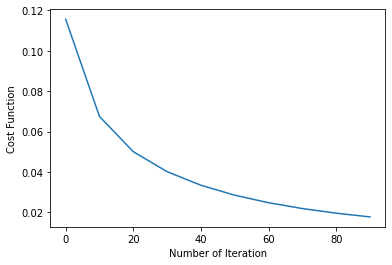

Predicted value for featureset [1, 23, 1106, 252, 790, 230, 1.8523] is : 659490138151.5026


In [30]:
class PolynomialRegressionI(GradientDescent):

    def __init__(self, dimension, data_feat, data_exp, alpha, threshold):
        super().__init__(dimension, data_feat, data_exp, alpha, threshold)
        if self.dimension != len(data_feat[0]):
            raise Exception("Invalid data set.")

    ## Overridden cost function from superclass.
    def cost(self,feature):
        cos = 0

        for i in range(len(self.data_feat)):
            s = 0
            for j in range(len(self.data_feat[i])):
                s += feature[j]*self.data_feat[i][j]
            diff = abs(s - self.data_exp[i])
            diff = diff**4 ##Cost function is fourth power of absolute value of difference
            cos += diff

        cos = cos/(2*len(self.data_feat))
        return cos



    def predict(self,feature):
        if len(feature) != len(self.features):
            raise Exception("Unappropriate data.")

        s = 0
        for i in range(len(feature)):
            s+= self.features[i]*feature[i]

        return s


## __Main__

data_feat = []      #Training data set
data_exp = []       #Training expected values

test_feat = []      #Testing dataset
test_exp = []       #Testing Expected values



with open('../input/housingprice/data.csv') as data:
    csv_reader = csv.reader(data, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            pass
            line_count += 1
        else:
            if line_count < 8000:
                data_feat.append([1, int(row[0])/52,(int(row[0])/52)**2, int(row[1])/37937,(int(row[1])/37937)**2, int(row[2])/5471,(int(row[2])/5471)**2, int(row[3])/35682,(int(row[3])/35682)**2, int(row[4])/5189,(int(row[4])/5189)**2, float(row[5])/15.0001,(float(row[5])/15.0001)**2])
                data_exp.append(float(row[6])/500001)
                line_count+=1
            else:
                test_feat.append([1, int(row[0])/52,(int(row[0])/52)**2, int(row[1])/37937,(int(row[1])/37937)**2, int(row[2])/5471,(int(row[2])/5471)**2, int(row[3])/35682,(int(row[3])/35682)**2, int(row[4])/5189,(int(row[4])/5189)**2, float(row[5])/15.0001,(float(row[5])/15.0001)**2])
                test_exp.append(float(row[6])/500001)
                line_count+=1



demo = PolynomialRegressionI(13,data_feat,data_exp,0.1,0.01)
n = int(input("Enter number of Iterations (For fast results enter 100) : "))
x = np.arange(0,n,10)
y = []
for i in range(len(x)):
    demo.descent(10)
    y.append(demo.cost(demo.features))

plt.plot(x,y)
plt.ylabel("Cost Function")
plt.xlabel("Number of Iteration")
plt.show()          #To display Variation of Cost function with number of iterations

predicted = demo.predict([1,23,23**2,1106,1106**2,252,252**2,790,790**2,230,230**2,1.8523,1.8523**2])*500001

print("Predicted value for featureset {} is : {}".format([1,23,1106,252,790,230,1.8523],predicted))

In [32]:
class PolynomialRegressionII(GradientDescent):

    def __init__(self, dimension, data_feat, data_exp, alpha, threshold):
        super().__init__(dimension, data_feat, data_exp, alpha, threshold)
        if self.dimension != len(data_feat[0]):
            raise Exception("Invalid data set.")

    ## Overridden cost function from superclass.
    def cost(self,feature):
        cos = 0

        for i in range(len(self.data_feat)):
            s = 0
            for j in range(len(self.data_feat[i])):
                s += feature[j]*self.data_feat[i][j]
            diff = abs(s - self.data_exp[i])
            diff = diff**7 ##Cost function is fourth power of absolute value of difference
            cos += diff

        cos = cos/(2*len(self.data_feat))
        return cos



    def predict(self,feature):
        if len(feature) != len(self.features):
            raise Exception("Unappropriate data.")

        s = 0
        for i in range(len(feature)):
            s+= self.features[i]*feature[i]

        return s


## __Main__

data_feat = []      #Training data set
data_exp = []       #Training expected values

test_feat = []      #Testing dataset
test_exp = []       #Testing Expected values



with open('../input/housingprice/data.csv') as data:
    csv_reader = csv.reader(data, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            pass
            line_count += 1
        else:
            if line_count < 8000:
                data_feat.append([1, int(row[0])/52,(int(row[0])/52)**2, int(row[1])/37937,(int(row[1])/37937)**2, int(row[2])/5471,(int(row[2])/5471)**2, int(row[3])/35682,(int(row[3])/35682)**2, int(row[4])/5189,(int(row[4])/5189)**2, float(row[5])/15.0001,(float(row[5])/15.0001)**2])
                data_exp.append(float(row[6])/500001)
                line_count+=1
            else:
                test_feat.append([1, int(row[0])/52,(int(row[0])/52)**2, int(row[1])/37937,(int(row[1])/37937)**2, int(row[2])/5471,(int(row[2])/5471)**2, int(row[3])/35682,(int(row[3])/35682)**2, int(row[4])/5189,(int(row[4])/5189)**2, float(row[5])/15.0001,(float(row[5])/15.0001)**2])
                test_exp.append(float(row[6])/500001)
                line_count+=1



demo = PolynomialRegressionII(13,data_feat,data_exp,0.1,0.01)
n = int(input("Enter number of Iterations (For fast results enter 100) : "))
x = np.arange(0,n,10)
y = []
for i in range(len(x)):
    demo.descent(10)
    y.append(demo.cost(demo.features))

plt.plot(x,y)
plt.ylabel("Cost Function")
plt.xlabel("Number of Iteration")
plt.show()          #To display Variation of Cost function with number of iterations

predicted = demo.predict([1,23,23**2,1106,1106**2,252,252**2,790,790**2,230,230**2,1.8523,1.8523**2])*500001

print("Predicted value for featureset {} is : {}".format([1,23,1106,252,790,230,1.8523],predicted))

Enter number of Iterations (For fast results enter 100) :  100


OverflowError: (34, 'Numerical result out of range')